# Sandbox for visualising

## Trying with normal output

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df_ingred = pd.read_csv("Data/ingredients.csv")
df_recipes = pd.read_csv("Data/recipes.csv")

num_dup_ingreds = df_ingred.duplicated().sum()
df_ingred.drop_duplicates(inplace=True)

num_dup_recipes = df_recipes.duplicated().sum()
df_recipes.drop_duplicates(inplace=True)

df_merged = pd.merge(df_recipes, df_ingred, left_on="ID", right_on="ID_recipe")

print(f"Ingredients and recipes contained {num_dup_ingreds} and {num_dup_recipes}, respectively.")

Ingredients and recipes contained 26 and 0, respectively.


In [34]:
num_ingredients = len(df_ingred["ingredients"].unique())
num_recipes = len(df_ingred["ID_recipe"].unique())
num_cuisine = len(df_recipes["cuisine"].unique())

print(f"There are {num_ingredients} different ingredients and {num_recipes} different recipes, each belonging to one of {num_cuisine} different cuisines.")

There are 6714 different ingredients and 39774 different recipes, each belonging to one of 20 different cuisines.


In [70]:
df_ingred.drop_duplicates(inplace=True)

In [62]:
mean_num_ingredients = df_ingred.groupby(["ID_recipe"]).count().mean()["ingredients"]
print(f"On average, recipes have {mean_num_ingredients: .2f} different ingredients.")

On average, recipes have  10.77 different ingredients.


### What is the most common ingredient (for each cuisine), what is the most common cuisine?

In [111]:
df_ingred[df_ingred["ingredients"] == "salt"].count()

ID_recipe      18048
ingredients    18048
dtype: int64

In [154]:
# most common ingredient
max_ingredient = df_ingred.mode()["ingredients"][0]

ingred_percentage = int(df_ingred.groupby("ingredients").count().max()) / len(df_ingred["ID_recipe"].unique())

print(f"Contained in {ingred_percentage*100:.0f}% of recipes, the most common ingredient is: {max_ingredient}.")

# most common recipe by cuisine
print("For each cuisine, the most common ingredients is listed below. -> Take away: always something salty.")
df_merged.groupby("cuisine")["ingredients"].agg(pd.Series.mode).to_frame()

Contained in 45% of recipes, the most common ingredient is: salt.


,ingredients
cuisine,
brazilian,salt
british,salt
cajun_creole,salt
chinese,soy sauce
filipino,salt
french,salt
greek,salt
indian,salt
irish,salt


In [60]:
df_merged.groupby(["cuisine"])["ingredients"].count()#, "ingredients"]).count()["ID"]

#.count()["ID"].nlargest(3)
# df_merged.groupby(["cuisine", "ingredients"]).count().groupby(["cuisine"])["ID"].nlargest(3).to_frame()

cuisine
brazilian        4446
british          7806
cajun_creole    19506
chinese         32030
filipino         7550
french          25978
greek           11955
indian          38156
irish            6203
italian         77657
jamaican         6425
japanese        13853
korean           9366
mexican         70022
moroccan        10599
russian          5000
southern_us     41623
spanish         10309
thai            19308
vietnamese      10457
Name: ingredients, dtype: int64

In [51]:
# N most common ingredients for cuisines recipes
df_merged.groupby(["cuisine", "ingredients"]).count().groupby(["cuisine"])["ID"].nlargest(3).to_frame().droplevel(1)

ID
cuisine      ingredients            
brazilian    salt                194
             onions              133
             olive oil           118
british      salt                407
             all-purpose flour   238
             butter              222
cajun_creole salt                743
             onions              529
             garlic              370
chinese      soy sauce          1363
             sesame oil          915
             salt                907
filipino     salt                421
             garlic              325
             onions              310
french       salt               1203
             sugar               637
             all-purpose flour   593
greek        salt                571
             olive oil           503
             dried oregano       266
indian       salt               1934
             onions             1195
             garam masala        862
irish        salt                376
             all-purpose flour   219
             butter              219
italian      salt               3454
             olive oil          3111
             garlic cloves      1619
jamaican     salt                332
             onions              173
             water               153
japanese     soy sauce           561
             salt                422
             mirin               402
korean       soy sauce           427
             sesame oil          403
             garlic              303
mexican      salt               2720
             onions             1493
             ground cumin       1346
moroccan     salt                413
             olive oil           412
             ground cumin        348
russian      salt                288
             sugar               155
             onions              145
southern_us  salt               2290
             butter             1255
             all-purpose flour  1222
spanish      salt                460
             olive oil           387
             garlic cloves       290
thai         fish sauce          625
             garlic              414
             salt                396
vietnamese   fish sauce          392
             sugar               344
             salt                264

In [130]:
# most frequent cuisine
max_cuisine = df_recipes.mode()["cuisine"][0]

cuisine_percentage = int(df_recipes.groupby("cuisine").count().max()) / len(df_recipes["ID"].unique())

print(f"With a share of {cuisine_percentage*100:.0f}%, the most common cuisine across all recipes is: {max_cuisine}.")

With a share of 20%, the most common cuisine across all recipes is: italian.


In [3]:
# most common ingredient
df_ingred.groupby(["ingredients"]).head()

,ID_recipe,ingredients
0,10259,romaine lettuce
1,10259,black olives
2,10259,grape tomatoes
3,10259,garlic
4,10259,pepper
...,...,...
428203,7377,cheddar cheese soup
428223,11462,KRAFT Zesty Italian Dressing
428231,2238,citrus fruit
428233,2238,sourdough starter


---

## Graphisch   

6 cuisines have more than 2000 recipes, which amount to 68% of total recipes.


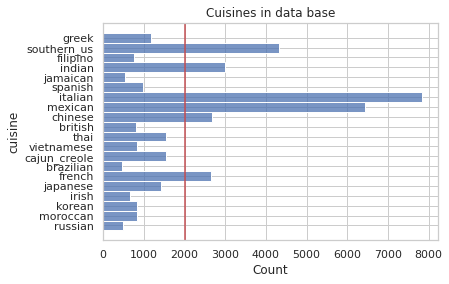

In [46]:
# Occurence of recipes -> look at cuisines with more than 2000 recipes
sns.set_theme(style="whitegrid", palette="deep")
g = sns.histplot(data=df_recipes, y="cuisine")
g.axvline(2000, color='r')
plt.title("Cuisine representation in data base")

# What share to the 6 largest recipes have?
recipe_threshold = 2000
num_cusinises_g2000 = int(df_recipes.groupby("cuisine").count().query(f"ID > {recipe_threshold}").count())
num_recipes_g2000_cuisines = df_recipes.groupby("cuisine").count().query(f"ID > {recipe_threshold}").sum()
share_g2000_cuisines = int(num_recipes_g2000_cuisines) / num_recipes

print(f"{num_cusinises_g2000} cuisines have more than {recipe_threshold} recipes, which amount to {share_g2000_cuisines*100:.0f}% of total recipes.")

### Complexity

Text(0.5, 1.0, 'Number of ingredients.')

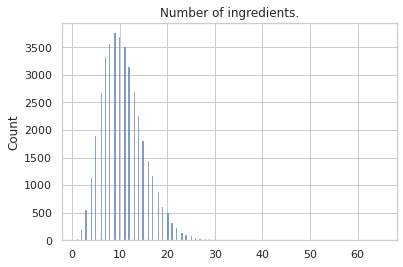

In [295]:
recipe_sizes = df_merged.groupby("ID").size()
g = sns.histplot(data=recipe_sizes)
plt.title("Number of ingredients.")

Text(0.5, 1.0, 'Average number of ingredients')

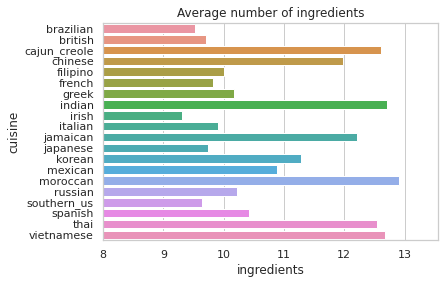

In [298]:
#df_merged.groupby(["cuisine", "ingredients"]).count().groupby(["cuisine"])["ID"].nlargest(3).to_frame().droplevel(1)
a = df_merged.groupby(["cuisine", "ID"]).count().groupby(["cuisine"])["ingredients"].mean().to_frame()
b = df_merged.groupby(["cuisine", "ID"]).count().groupby(["cuisine"])["ingredients"].std().to_frame()
c = a/b
g = sns.barplot(data=a, y=a.index, x="ingredients").set(xlim=(8,None))
plt.title("Average number of ingredients")

In [201]:
# max ingredient size
df_merged.groupby(["ID", "cuisine"])["ingredients"].count().nlargest(5)

ID     cuisine  
3885   italian      65
13430  brazilian    59
13049  mexican      52
2253   indian       49
49282  mexican      49
Name: ingredients, dtype: int64

In [246]:
# max recipe ingredients
df_merged.set_index("ID").loc[13430]

,cuisine,ID_recipe,ingredients
ID,,,
13430,brazilian,13430,marshmallows
13430,brazilian,13430,fresh corn
13430,brazilian,13430,cheddar cheese
13430,brazilian,13430,shredded coconut
13430,brazilian,13430,water
13430,brazilian,13430,honey
13430,brazilian,13430,baking soda
13430,brazilian,13430,dijon mustard
13430,brazilian,13430,sweet potatoes


In [243]:
# min_ingredient_size
min_ids = df_merged.groupby(["ID", "cuisine"]).size().reset_index(name='counts').query(f"counts == 1")["ID"]

assert(len(df_merged.set_index("ID").loc[min_ids]["ingredients"]) == len(min_ids))

print(f"There exist {len(min_ids)} single ingredient recipes.")
df_merged.set_index("ID").loc[min_ids].groupby(["ingredients"]).size().reset_index(name='counts')

There exist 22 single ingredient recipes.


,ingredients,counts
0,butter,2
1,cherry tomatoes,1
2,corn tortillas,1
3,cumin seed,1
4,dried rice noodles,1
5,grained,1
6,haricots verts,1
7,jasmine rice,1
8,lemonade concentrate,1
9,phyllo,1


In [274]:
# longest ingredient
longest_ingredient = df_ingred["ingredients"].str.len().to_frame().idxmax()
df_ingred.loc[longest_ingredient]["ingredients"].iloc[0]

'Pillsbury™ Crescent Recipe Creations® refrigerated seamless dough sheet'

In [300]:
# shortest ingredient
longest_ingredient = df_ingred["ingredients"].str.len().to_frame().idxmin()
df_ingred.loc[longest_ingredient]["ingredients"].iloc[0]

'mi'